# Grafica del NYT What’s Going On in This Graph? | Global Climate Risk

Se realizara la siguiente [grafica](https://www.nytimes.com/2021/03/25/learning/whats-going-on-in-this-graph-global-climate-risks.html)


In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
# Aqui Creo los datos ficticios de aalgunos paises 
data = {
    'name': ['China', 'India', 'Indonesia', 'Japon', 'Russia', 'Brazil', 'England', 'Canada', 'Mexico',
             'United States of America', 'Guatemala', 'Belize', 'Chile', 'Argentina'],
    'Flooding': np.random.randint(10000000, 100000000, 14),
    'Heat Stress': np.random.randint(10000000, 100000000, 14),
    'Water Stress': np.random.randint(10000000, 100000000, 14),
    'Wildfires': np.random.randint(10000000, 100000000, 14),
    'Hurricanes and tryphoons': np.random.randint(10000000, 100000000, 14),
    'Sea level rise': np.random.randint(10000000, 100000000, 14),
}

In [47]:

# Crear un DataFrame con los datos
df = pd.DataFrame(data)


In [48]:
df

,name,Flooding,Heat Stress,Water Stress,Wildfires,Hurricanes and tryphoons,Sea level rise
0,China,19891383,26205965,57549224,86332001,26931675,12925137
1,India,82131926,56279183,94865971,83304513,23232699,62652581
2,Indonesia,12972265,67506685,49902040,98425718,16460228,17681836
3,Japon,20616622,11833368,86073422,15545079,82796094,96561040
4,Russia,58612064,33127348,93836470,66400019,50247223,54975135
5,Brazil,95796505,68364688,30850427,86708943,49977104,28288797
6,England,88987419,17286455,30339948,52253735,59135524,30216551
7,Canada,48385050,23154025,15739808,68365105,46913887,11211397
8,Mexico,57169388,49915487,69377673,49956189,80200452,43657977
9,United States of America,76021627,76526647,39291306,19959252,79511662,43181419


In [49]:

# Leer el conjunto de datos del mapa mundial
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


C:\Users\Yos\AppData\Local\Temp\ipykernel_13780\582239396.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [50]:
world.describe()

,pop_est,gdp_md_est
count,1.770000e+02,1.770000e+02
mean,4.324346e+07,4.934739e+05
std,1.513543e+08,2.019326e+06
min,1.400000e+02,1.600000e+01
25%,3.301000e+06,1.346900e+04
50%,1.019232e+07,5.040000e+04
75%,3.182530e+07,2.619210e+05
max,1.397715e+09,2.143323e+07


In [44]:
# Combinar datos ficticios con datos del mapa ya esta base precargada tiene la geometria de cada pais 
merged = world.merge(df, how='left', on='name')


In [51]:
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Flooding,Heat Stress,Water Stress,Wildfires,Hurricanes and tryphoons,Sea level rise
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",89663120.0,98596227.0,81326051.0,85912888.0,80672042.0,81948721.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",13501113.0,49132513.0,91862881.0,61626682.0,61522916.0,94107073.0
...,...,...,...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN,NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#aca relleno los nulls con mas datos para pintar todos los paises
num_rows, num_cols = merged.shape

# Rellenar los valores NaN con números aleatorios
for col in merged.columns:
    merged[col].fillna(np.random.randint(10000000, 100000000), inplace=True)

In [67]:
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Flooding,Heat Stress,Water Stress,Wildfires,Hurricanes and tryphoons,Sea level rise
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",50604237.0,60882170.0,76190594.0,66587407.0,77354890.0,20133413.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",50604237.0,60882170.0,76190594.0,66587407.0,77354890.0,20133413.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",50604237.0,60882170.0,76190594.0,66587407.0,77354890.0,20133413.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",89663120.0,98596227.0,81326051.0,85912888.0,80672042.0,81948721.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",13501113.0,49132513.0,91862881.0,61626682.0,61522916.0,94107073.0
...,...,...,...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",50604237.0,60882170.0,76190594.0,66587407.0,77354890.0,20133413.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",50604237.0,60882170.0,76190594.0,66587407.0,77354890.0,20133413.0
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",50604237.0,60882170.0,76190594.0,66587407.0,77354890.0,20133413.0
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",50604237.0,60882170.0,76190594.0,66587407.0,77354890.0,20133413.0


In [68]:
# Seleccionamos las columnas que deseas visualizar en el mapa de calor
columns_to_plot = ['Flooding', 'Heat Stress', 'Water Stress', 'Wildfires', 'Hurricanes and tryphoons', 'Sea level rise']


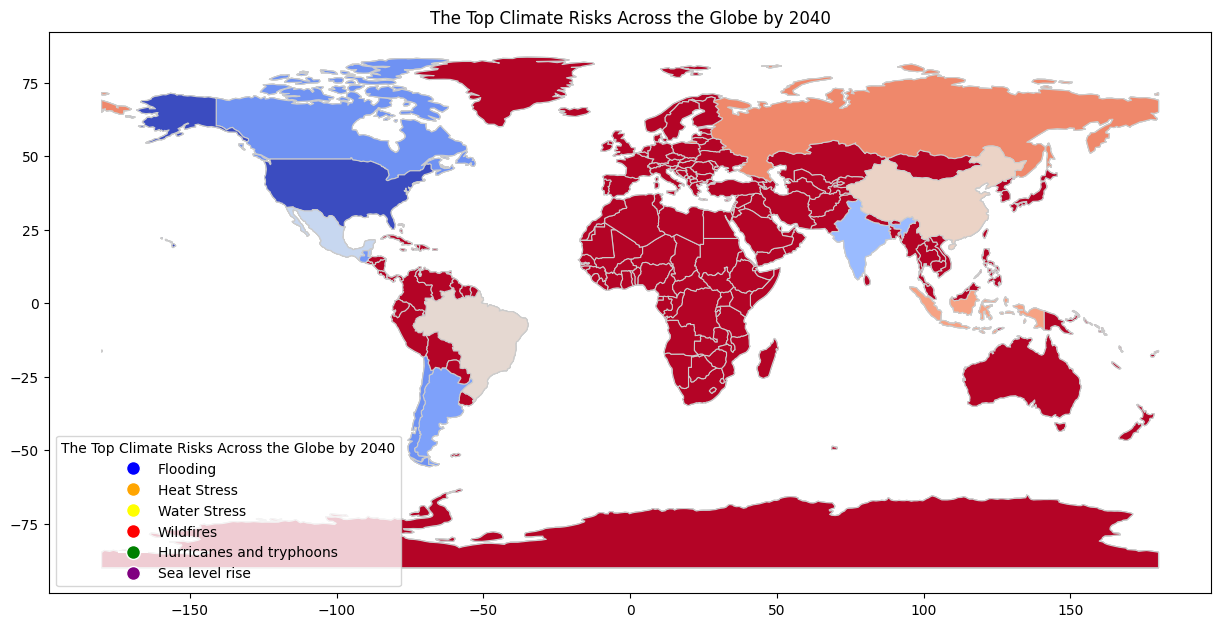

In [75]:

# Configuramos el tamaño del mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Dibujamos el mapa base
world.plot(ax=ax, color='lightgrey')

# Iteramos sobre las columnas seleccionadas y crear un mapa de calor para cada una
for i, column_to_plot in enumerate(columns_to_plot):
    # Dibujamos los polígonos coloreados según la columna seleccionada
    merged.plot(column=column_to_plot, cmap=f'coolwarm_r', linewidth=0.8, ax=ax, edgecolor='0.8', label=column_to_plot)

# Añadir título
plt.title('The Top Climate Risks Across the Globe by 2040')

#  Se Crea un diccionario para mapear los nombres de las columnas con los colores
color_dict = {'Flooding': 'blue', 'Heat Stress': 'orange', 'Water Stress': 'yellow', 'Wildfires': 'red', 'Hurricanes and tryphoons': 'green', 'Sea level rise': 'purple'}



# Se crea una leyenda fuera del mapa
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=value) for key, value in color_dict.items()]
plt.legend(handles=legend_elements, loc='lower left', title='The Top Climate Risks Across the Globe by 2040')


plt.show()